# 4.셀프 주유소는 정말 값이 싼가요?

## 크롤링
###  4-1 Selenium 사용하기

### 설치방법
* 1) pip install selenium
* 2) 웹드라이버 다운로드 - driver폴더 및 images 생성
* 3) 디렉토리 경로 : C:\dataAnalysis\philosophy_datascience\DataScience\
* 4) 웹 드라이버 다운로드 : 크롬드라이버 
* 5) 다운로드 받은 크롬 웹드라이버를 압축해제 후 driver폴더에 갖다 놓음

frame혹은 iframe내에서 데이터를 로드하여 보여주는 경우엔, url이 바뀌지 않는다. 이런 경우엔, BeautifulSoup에서 처리되지 않는다.
이에 대한 대안으로 selenium을 사용한다.
* [selenium](https://fenderist.tistory.com/168)
* [파이썬 시각화](https://ericnjennifer.github.io/python_visualization)
* [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [7]:
from selenium import webdriver
import os

os.getcwd()

'C:\\dataAnalysis\\philosophy_datascience\\999.Data Analysis Project'

In [4]:

driver = webdriver.Chrome('./driver/chromedriver.exe')
driver.get("http://naver.com")

WebDriverException: Message: 'chromedriver.exe' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


In [6]:
driver.save_screenshot("../images/001.png")

True

In [7]:
driver.close()

### 주의사항 : 교재의 naver mail가져오는것 절대 하지 마세요.

In [ ]:
elem_login = driver.find_elelment_by_id("id")
elem_login_clear()
elem_login.send_keys("dndwldn")

elem_login = drive.find_element_by_id("pwd")
elem_login_clear()
ele_login.send_keys("!119Service!")

In [ ]:
xpath = """//*[@id="frmNIDLogin"]/fieldset/span/input"""
driver.find_element_by_xpath(xpath).click()

In [ ]:
driver.get("http://mail.naver.com")

In [ ]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

In [ ]:
raw_list = soup.find_all('div', 'name_Ccr(list.from)')
raw_list

In [ ]:
send_list = [raw_list[n].find('a').get_text() from n in range(0, len(raw_list))]
send_list

In [ ]:
driver.close()

### 4.2 서울시 구별 주유소 가격 정보 얻기

In [26]:
driver = webdriver.Chrome("../driver/chromedriver.exe")
# get(url) - 웹 페이지를 읽어들임
driver.get("http://www.opinet.co.kr/searRgSelect.do")

* 지역에 **서울** 이라고 나타나지 않으면 크롬드라이버에서 손으로 **서울** 을 잡아주세요

In [14]:
# find_element_by_xpath(query) : xpath를 지정해 요소를 여러개 추출
# //*[@id="SIGUNGU_NM0"]
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")

# find_elements_by_tag_name(name) : 's -===> 복수일 경우'
gu_list = gu_list_raw.find_elements_by_tag_name("option")

# <class 'list'>
#print(type(gu_list), dir(gu_list))

In [17]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [18]:
# find_element_by_id() : id속성으로 요소를 하나 추출
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[0])   # 검색하고하는 구 정보 

In [19]:
# click() : 요소를 클릭
# //*[@id="searRgSelect"]
xpath = """//*[@id="searRgSelect"]"""
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [21]:
# 엑셀버튼 클릭
xpath = """//*[@id="glopopd_excel"]"""
elem_get_excel = driver.find_element_by_xpath(xpath).click()

In [27]:
import time 
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    # find_element_by_id() : id속성으로 요소를 하나 추출
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)   # 검색하고하는 구 정보 
    
    time.sleep(2)
    
    # click() : 요소를 클릭
    xpath ="""//*[@id="searRgSelect"]"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    # 엑셀버튼 클릭
    xpath = """//*[@id="glopopd_excel"]"""
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    

In [28]:
driver.close()

## 전처리
### 4.5 구별 주유 가격에 대한 데이터의 정리

In [30]:
import pandas as pd
from glob import glob

In [52]:
glob('../data/지역_위치별*.xls')

[]

In [55]:
station_files = glob("../data/지역_위치별*.xls")
station_files

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls',
 '../data\\지역_위치별(주유소).xls']

### 엑셀파일 concat

In [44]:
import os
print(os.getcwd())

C:\dataAnalysis\philosophy_datascience\DataScience\source


In [58]:
tmp_raw = []
for file_name in station_files:
    # print(file_name)
    tmp = pd.read_excel(file_name, header = 2)
    tmp_raw.append(tmp)
station_raw = pd.concat(tmp_raw)    

../data\지역_위치별(주유소) (1).xls
../data\지역_위치별(주유소) (10).xls
../data\지역_위치별(주유소) (11).xls
../data\지역_위치별(주유소) (12).xls
../data\지역_위치별(주유소) (13).xls
../data\지역_위치별(주유소) (14).xls
../data\지역_위치별(주유소) (15).xls
../data\지역_위치별(주유소) (16).xls
../data\지역_위치별(주유소) (17).xls
../data\지역_위치별(주유소) (18).xls
../data\지역_위치별(주유소) (19).xls
../data\지역_위치별(주유소) (2).xls
../data\지역_위치별(주유소) (20).xls
../data\지역_위치별(주유소) (21).xls
../data\지역_위치별(주유소) (22).xls
../data\지역_위치별(주유소) (23).xls
../data\지역_위치별(주유소) (3).xls
../data\지역_위치별(주유소) (4).xls
../data\지역_위치별(주유소) (5).xls
../data\지역_위치별(주유소) (6).xls
../data\지역_위치별(주유소) (7).xls
../data\지역_위치별(주유소) (8).xls
../data\지역_위치별(주유소) (9).xls
../data\지역_위치별(주유소).xls


In [59]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 39
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      482 non-null    object
 1   상호      482 non-null    object
 2   주소      482 non-null    object
 3   상표      482 non-null    object
 4   전화번호    482 non-null    object
 5   셀프여부    482 non-null    object
 6   고급휘발유   482 non-null    object
 7   휘발유     482 non-null    object
 8   경유      482 non-null    object
 9   실내등유    482 non-null    object
dtypes: object(10)
memory usage: 41.4+ KB


In [60]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,수유동주유소,서울 강북구 도봉로 395 (수유동),GS칼텍스,02-902-9470,Y,-,1293,1093,-
1,서울특별시,북서울고속주유소,서울 강북구 삼양로 410 (수유동),S-OIL,02-907-5182,Y,-,1299,1099,-
2,서울특별시,(주)마봉직영 덕릉로주유소,서울 강북구 덕릉로 158 (번동),S-OIL,02-989-9806,N,-,1299,1098,-
3,서울특별시,에덴주유소,서울 강북구 월계로 195 (번동),SK에너지,02-987-8182,Y,-,1307,1107,-
4,서울특별시,(주)석산에너지,서울 강북구 삼양로 316 (수유동),현대오일뱅크,02-980-1448,Y,-,1309,1109,800


In [61]:
station_raw['상호']

0             수유동주유소
1           북서울고속주유소
2     (주)마봉직영 덕릉로주유소
3              에덴주유소
4           (주)석산에너지
           ...      
35            학여울주유소
36          (주)만정에너지
37           뉴서울(강남)
38             동우주유소
39             삼성주유소
Name: 상호, Length: 482, dtype: object

In [62]:
# 휘발유 가격만 살펴볼 예정
stations = pd.DataFrame({'주유소': station_raw['상호'],
                        '주소': station_raw['주소'],
                        '가격': station_raw['휘발유'],
                        '셀프': station_raw['셀프여부'],
                        '상표': station_raw['상표']}
                       )
stations.head()

,주유소,주소,가격,셀프,상표
0,수유동주유소,서울 강북구 도봉로 395 (수유동),1293,Y,GS칼텍스
1,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1299,Y,S-OIL
2,(주)마봉직영 덕릉로주유소,서울 강북구 덕릉로 158 (번동),1299,N,S-OIL
3,에덴주유소,서울 강북구 월계로 195 (번동),1307,Y,SK에너지
4,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1309,Y,현대오일뱅크


In [63]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.tail()

,주유소,주소,가격,셀프,상표,구
35,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),1896,N,GS칼텍스,강남구
36,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),1933,N,GS칼텍스,강남구
37,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025,N,SK에너지,강남구
38,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
39,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구


In [64]:
stations['구'].unique()

array(['강북구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구',
       '영등포구', '용산구', '강서구', '은평구', '종로구', '중구', '중랑구', '관악구', '광진구',
       '구로구', '금천구', '노원구', '도봉구', '동대문구', '강남구'], dtype=object)

In [65]:
stations[stations['구'] == '서울특별시']

,주유소,주소,가격,셀프,상표,구


In [66]:
stations.loc[stations['구']=='서울특별시', '구'] = '성동구'
stations['구'].unique()

array(['강북구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구',
       '영등포구', '용산구', '강서구', '은평구', '종로구', '중구', '중랑구', '관악구', '광진구',
       '구로구', '금천구', '노원구', '도봉구', '동대문구', '강남구'], dtype=object)

In [102]:
stations.loc[stations['구'] == '특별시', '구'] = '도봉구'
stations['구'].unique()

array(['관악구', '강동구', '강북구', '강서구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구',
       '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구', '강남구'], dtype=object)

In [67]:
stations[stations['가격'] == '-']

,주유소,주소,가격,셀프,상표,구
12,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
35,전당앞주유소,서울 서초구 남부순환로 2391 (서초동),-,N,SK에너지,서초구
30,보라주유소,서울 영등포구 영등포로 399 (신길동),-,N,GS칼텍스,영등포구
31,성락주유소,서울 영등포구 가마산로 414 (신길동),-,Y,S-OIL,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
10,에스씨(주) 역전주유소,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
14,양지진흥개발(주)상계주유소,서울 노원구 노해로 527 (상계동),-,N,SK에너지,노원구
21,신성주유소,서울 동대문구 장한로 29 (장안동),-,N,현대오일뱅크,동대문구
38,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
39,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구


In [68]:
stations = stations[stations['가격'] != '-']
stations[stations['가격'] == '-']

,주유소,주소,가격,셀프,상표,구


In [69]:
stations.head(20)

,주유소,주소,가격,셀프,상표,구
0,수유동주유소,서울 강북구 도봉로 395 (수유동),1293,Y,GS칼텍스,강북구
1,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1299,Y,S-OIL,강북구
2,(주)마봉직영 덕릉로주유소,서울 강북구 덕릉로 158 (번동),1299,N,S-OIL,강북구
3,에덴주유소,서울 강북구 월계로 195 (번동),1307,Y,SK에너지,강북구
4,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1309,Y,현대오일뱅크,강북구
5,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),1314,Y,GS칼텍스,강북구
6,KH에너지(주)직영 송정주유소,서울 강북구 인수봉로 185 (수유동),1319,N,SK에너지,강북구
7,SK에너지(주) 매일주유소,서울 강북구 삼양로 217 (미아동),1319,Y,SK에너지,강북구
8,현대오일뱅크(주)직영 미아셀프주유소,서울 강북구 도봉로 200 (미아동),1319,Y,현대오일뱅크,강북구
9,현대오일뱅크(주)직영 번동셀프주유소,서울 강북구 한천로 963 (번동),1319,Y,현대오일뱅크,강북구


In [70]:
stations['가격'] = [float(value) for value in stations['가격']]
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 0 to 37
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   주유소     472 non-null    object 
 1   주소      472 non-null    object 
 2   가격      472 non-null    float64
 3   셀프      472 non-null    object 
 4   상표      472 non-null    object 
 5   구       472 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.8+ KB


In [71]:
# 인덱스를 처음부터 다시 생성,원본 데이테 반영
stations.reset_index(inplace = True)

In [72]:
# index라는 컬럼 하나 더 생성된 것 삭제
del stations['index']

In [ ]:
del stations['level_0']

In [74]:
stations.head()

,주유소,주소,가격,셀프,상표,구
0,수유동주유소,서울 강북구 도봉로 395 (수유동),1293.0,Y,GS칼텍스,강북구
1,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1299.0,Y,S-OIL,강북구
2,(주)마봉직영 덕릉로주유소,서울 강북구 덕릉로 158 (번동),1299.0,N,S-OIL,강북구
3,에덴주유소,서울 강북구 월계로 195 (번동),1307.0,Y,SK에너지,강북구
4,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1309.0,Y,현대오일뱅크,강북구


In [75]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   주유소     472 non-null    object 
 1   주소      472 non-null    object 
 2   가격      472 non-null    float64
 3   셀프      472 non-null    object 
 4   상표      472 non-null    object 
 5   구       472 non-null    object 
dtypes: float64(1), object(5)
memory usage: 22.2+ KB


# 시각화

## 4.4 셀프주유소는 정말 저렴한지 boxplot으로 확인

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import platform 

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    rc('font', famlily ='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family= font_name)
else:
    print('Unknow System...')

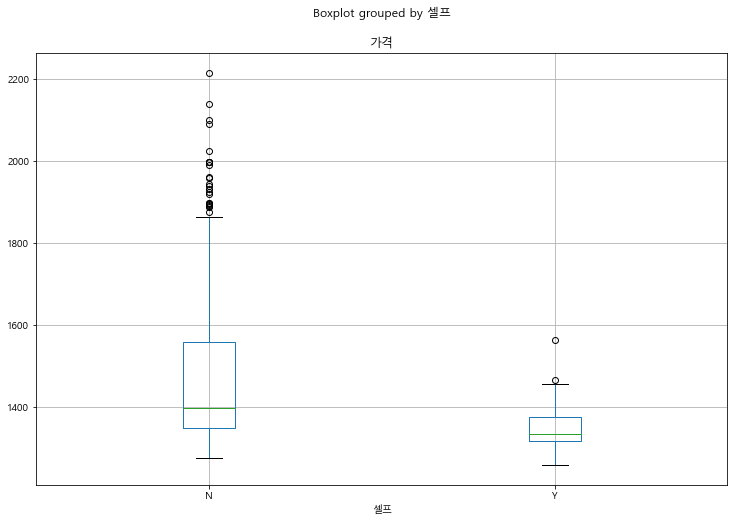

In [83]:
stations.boxplot(column='가격', by = '셀프', figsize = (12, 8))

### 휘발유가격의 상표별 분포를 보고 싶다.
* [seaborn 컬럼 팔레트](http://hleecaster.com/python-seaborn-color/) 

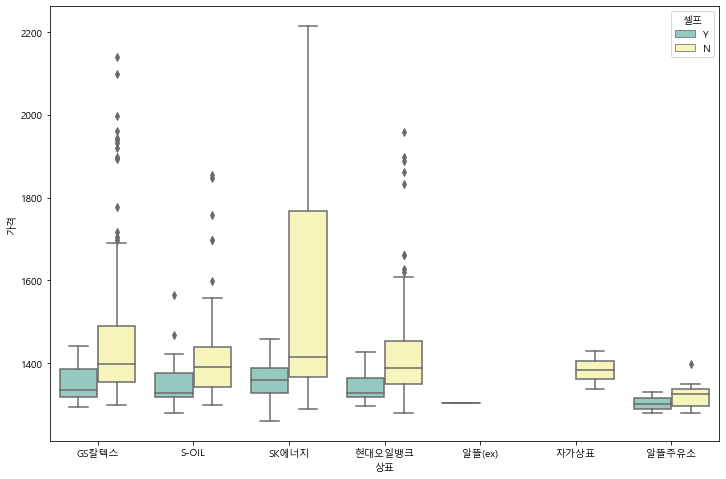

In [87]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data = stations, palette="Set3")
plt.show()

#### 휘발유 가격이 어디에 더 많이 부포되어있는지 확인.
* swarmplot

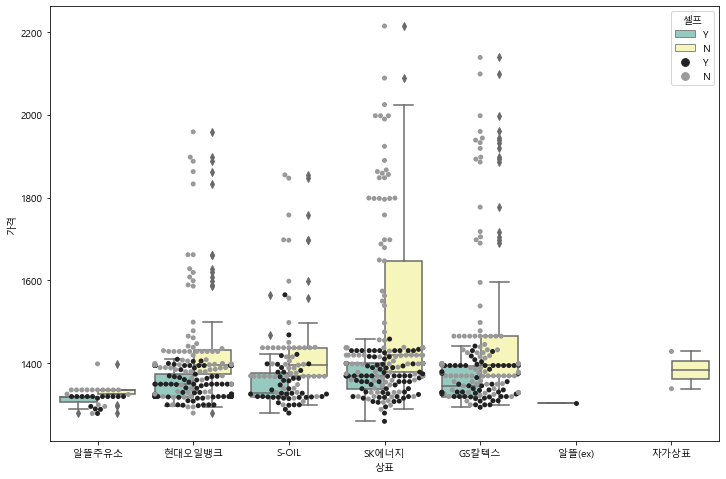

In [142]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = '상표', y= '가격', hue='셀프', data = stations, palette='Set3')
sns.swarmplot(x = '상표', y= '가격', hue='셀프', data = stations, color = ".6")
plt.show()

## 4.5 서울시 구별 주유 가격 확인하기

In [144]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [149]:
oil_mean = stations['가격'].mean()
print(oil_mean)

1416.9066455696202


In [151]:
stations.loc[(stations['가격'] > oil_mean) & (stations['셀프']=='Y')].sort_values(by='가격', ascending = False)

,Oil_store,주소,가격,셀프,상표,구
76,참솔에너지,서울 강서구 벌말로 281 (오곡동),1565.0,Y,S-OIL,강서구
600,일원주유소,서울 강남구 양재대로55길 3 (일원동),1468.0,Y,S-OIL,강남구
598,(주)중앙에너비스 수서지점,서울 강남구 광평로 202 (수서동),1458.0,Y,SK에너지,강남구
597,지에스칼텍스㈜ 삼성로주유소,서울 강남구 삼성로 563 (삼성동),1441.0,Y,GS칼텍스,강남구
595,대동석유 압구정주유소,서울 강남구 언주로 842 (신사동),1433.0,Y,SK에너지,강남구
12,(주)한유에너지행운셀프주유소,서울 관악구 남부순환로 1883 (봉천동),1430.0,Y,SK에너지,관악구
526,(주)한유에너지행운셀프주유소,서울 관악구 남부순환로 1883 (봉천동),1430.0,Y,SK에너지,관악구
574,(주)한유에너지행운셀프주유소,서울 관악구 남부순환로 1883 (봉천동),1430.0,Y,SK에너지,관악구
558,(주)한유에너지행운셀프주유소,서울 관악구 남부순환로 1883 (봉천동),1430.0,Y,SK에너지,관악구
542,(주)한유에너지행운셀프주유소,서울 관악구 남부순환로 1883 (봉천동),1430.0,Y,SK에너지,관악구


In [145]:
stations.sort_values(by = '가격', ascending = False).head(10)

,Oil_store,주소,가격,셀프,상표,구
481,서남주유소,서울 중구 통일로 30,2215.0,N,SK에너지,중구
430,서계주유소,서울 용산구 청파로 367 (서계동),2139.0,N,GS칼텍스,용산구
480,필동주유소,서울 중구 퇴계로 196 (필동2가),2099.0,N,GS칼텍스,중구
479,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2089.0,N,SK에너지,중구
615,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025.0,N,SK에너지,강남구
428,에너비스,서울 용산구 한남대로 82 (한남동),1998.0,N,SK에너지,용산구
470,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,1998.0,N,SK에너지,종로구
471,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1998.0,N,GS칼텍스,종로구
429,한남지점,서울 용산구 한남대로21길 4 (한남동),1998.0,N,SK에너지,용산구
427,동자동주유소,서울 용산구 한강대로104길 6 (동자동),1990.0,N,SK에너지,용산구


In [156]:
import numpy as np
gu_data = pd.pivot_table(stations, index = ['구'], values = ['가격'], aggfunc = np.mean)
gu_data.head()

,가격
구,
강남구,1550.342105
강동구,1450.062500
강북구,1311.076923
강서구,1362.818182
관악구,1394.250000


In [159]:
geo_path = "C:/dataAnalysis/philosophy_datascience/DataScience/data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding = 'utf-8'))

map = folium.Map(location = [37.5502, 126.982], zoom_start = 10.5, tiles = 'Stamen Toner')

map.choropleth(geo_data = geo_str,
              data = gu_data,
              columns = [gu_data.index, '가격'],
              fill_color = 'PuRd',
              key_on = 'feature.id')
map

## 4.6 서울시 주유 가격 상하위 10개 주유소 지도에 표시하기

In [188]:
oil_price_top10 = stations.sort_values(by ='가격', ascending = False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
481,서남주유소,서울 중구 통일로 30,2215.0,N,SK에너지,중구
430,서계주유소,서울 용산구 청파로 367 (서계동),2139.0,N,GS칼텍스,용산구
480,필동주유소,서울 중구 퇴계로 196 (필동2가),2099.0,N,GS칼텍스,중구
479,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2089.0,N,SK에너지,중구
615,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025.0,N,SK에너지,강남구
428,에너비스,서울 용산구 한남대로 82 (한남동),1998.0,N,SK에너지,용산구
470,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,1998.0,N,SK에너지,종로구
471,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1998.0,N,GS칼텍스,종로구
429,한남지점,서울 용산구 한남대로21길 4 (한남동),1998.0,N,SK에너지,용산구
427,동자동주유소,서울 용산구 한강대로104길 6 (동자동),1990.0,N,SK에너지,용산구


In [189]:
# 가격이 싼 주유소 top10
oil_price_bottom10 = stations.sort_values(by ='가격', ascending = True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
387,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1259.0,Y,SK에너지,영등포구
46,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1278.0,N,알뜰주유소,강서구
45,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1278.0,Y,알뜰주유소,강서구
361,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1279.0,Y,SK에너지,양천구
362,현대주유소,서울 양천구 남부순환로 372 (신월동),1279.0,Y,S-OIL,양천구
363,형산석유(주)원주유소,서울 양천구 남부순환로 408,1279.0,N,현대오일뱅크,양천구
111,SK구로주유소,서울 구로구 구일로 94 (구로동),1288.0,N,SK에너지,구로구
364,양천구주유소,서울 양천구 국회대로 275 (목동),1288.0,Y,알뜰주유소,양천구
304,장위주유소,서울 성북구 화랑로 110 (하월곡동),1288.0,Y,S-OIL,성북구
388,도림주유소,서울 영등포구 도림로 343 (도림동),1289.0,Y,알뜰주유소,영등포구


In [190]:
gmap_key = "*************"
gmaps = googlemaps.Client(gmap_key)

In [191]:
tmp_add = str('서울 구로구 구일로 94 (구로동)').split('(')[0]
print(tmp_add)

서울 구로구 구일로 94 


In [192]:
tmp_add = gmaps.geocode(tmp_add, language = 'ko')
print(tmp_add)

[{'address_components': [{'long_name': '９４', 'short_name': '９４', 'types': ['premise']}, {'long_name': '구일로', 'short_name': '구일로', 'types': ['political', 'sublocality', 'sublocality_level_4']}, {'long_name': '구로동', 'short_name': '구로동', 'types': ['political', 'sublocality', 'sublocality_level_2']}, {'long_name': '구로구', 'short_name': '구로구', 'types': ['political', 'sublocality', 'sublocality_level_1']}, {'long_name': '서울특별시', 'short_name': '서울특별시', 'types': ['administrative_area_level_1', 'political']}, {'long_name': '대한민국', 'short_name': 'KR', 'types': ['country', 'political']}, {'long_name': '152-050', 'short_name': '152-050', 'types': ['postal_code']}], 'formatted_address': '대한민국 서울특별시 구로구 구로동 구일로 94', 'geometry': {'location': {'lat': 37.4935494, 'lng': 126.8721653}, 'location_type': 'ROOFTOP', 'viewport': {'northeast': {'lat': 37.4948983802915, 'lng': 126.8735142802915}, 'southwest': {'lat': 37.4922004197085, 'lng': 126.8708163197085}}}, 'place_id': 'ChIJXYFkGAaefDURSKwr-7Y_nms', 'plus

In [193]:
print(tmp_add[0].get("formatted_address"))
print(tmp_add[0].get("geometry"))

대한민국 서울특별시 구로구 구로동 구일로 94
{'location': {'lat': 37.4935494, 'lng': 126.8721653}, 'location_type': 'ROOFTOP', 'viewport': {'northeast': {'lat': 37.4948983802915, 'lng': 126.8735142802915}, 'southwest': {'lat': 37.4922004197085, 'lng': 126.8708163197085}}}


In [194]:
print(tmp_add[0].get("geometry")["location"]["lat"])
print(tmp_add[0].get("geometry")["location"]["lng"])

37.4935494
126.8721653


In [200]:
from tqdm import tqdm_notebook
lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get("geometry")
        lat.append(tmp_loc["location"]["lat"])
        lng.append(tmp_loc["location"]["lng"])
    except:
        # 위경도 정보가 없는 경우 예외 처리 
        lat.append(np.nan)
        lng.append(np.nan)
        print('Here is nan!')
        
        
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
481,서남주유소,서울 중구 통일로 30,2215.0,N,SK에너지,중구,37.558348,126.972090
430,서계주유소,서울 용산구 청파로 367 (서계동),2139.0,N,GS칼텍스,용산구,37.552290,126.968935
480,필동주유소,서울 중구 퇴계로 196 (필동2가),2099.0,N,GS칼텍스,중구,37.560850,126.993653
479,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2089.0,N,SK에너지,중구,37.561648,126.997142
615,뉴서울(강남),서울 강남구 언주로 716 (논현동),2025.0,N,SK에너지,강남구,37.517636,127.035756
428,에너비스,서울 용산구 한남대로 82 (한남동),1998.0,N,SK에너지,용산구,37.535952,127.006130
470,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,1998.0,N,SK에너지,종로구,37.586068,127.001058
471,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),1998.0,N,GS칼텍스,종로구,37.574464,126.966618
429,한남지점,서울 용산구 한남대로21길 4 (한남동),1998.0,N,SK에너지,용산구,37.534657,127.006063
427,동자동주유소,서울 용산구 한강대로104길 6 (동자동),1990.0,N,SK에너지,용산구,37.550179,126.972463


In [201]:
from tqdm import tqdm_notebook
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = str(oil_price_bottom10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get("geometry")
        lat.append(tmp_loc["location"]["lat"])
        lng.append(tmp_loc["location"]["lng"])
    except:
        # 위경도 정보가 없는 경우 예외 처리 
        lat.append(np.nan)
        lng.append(np.nan)
        print('Here is nan!')
        
        
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
387,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1259.0,Y,SK에너지,영등포구,37.501567,126.898791
46,뉴신정주유소,서울 강서구 곰달래로 207(화곡동),1278.0,N,알뜰주유소,강서구,37.531554,126.856024
45,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1278.0,Y,알뜰주유소,강서구,37.540657,126.841506
361,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1279.0,Y,SK에너지,양천구,37.528087,126.832981
362,현대주유소,서울 양천구 남부순환로 372 (신월동),1279.0,Y,S-OIL,양천구,37.533811,126.829240
363,형산석유(주)원주유소,서울 양천구 남부순환로 408,1279.0,N,현대오일뱅크,양천구,37.531003,126.831022
111,SK구로주유소,서울 구로구 구일로 94 (구로동),1288.0,N,SK에너지,구로구,37.493549,126.872165
364,양천구주유소,서울 양천구 국회대로 275 (목동),1288.0,Y,알뜰주유소,양천구,37.530283,126.865529
304,장위주유소,서울 성북구 화랑로 110 (하월곡동),1288.0,Y,S-OIL,성북구,37.603583,127.043715
388,도림주유소,서울 영등포구 도림로 343 (도림동),1289.0,Y,알뜰주유소,영등포구,37.507656,126.900191


In [212]:
map = folium.Map(location = [37.5202, 126.975],zoom_start = 10.5 )

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]],
                       radius=15, color='#CD3181', 
                       fill_color='#CD3181',
                       popup = oil_price_top10['Oil_store'][n],     
                       fill=True).add_to(map)

for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]):
        folium.CircleMarker([oil_price_bottom10['lat'][n], oil_price_bottom10['lng'][n]],
                       radius=15, color='#3186cc', 
                       fill_color='#3186cc',
                       popup = oil_price_bottom10['Oil_store'][n],
                      fill=True).add_to(map)    
map    

### 퀴즈

1. 평일 2호선 5-6시 사이 정류장별 승차수 top20를 그래프로 그려 보세요.<br>
서울교통공사_관할역별_일별_시간대별_이용인원_20181231(1-8호선).xlsx

In [239]:
import pandas as pd
import numpy as np
import os

targetDir = os.chdir("C:/dataAnalysis/philosophy_datascience/DataScience/")

print(os.getcwd())

C:\dataAnalysis\philosophy_datascience\DataScience


In [228]:
train_traffic = pd.read_excel("C:/dataAnalysis/philosophy_datascience/DataScience/data/서울교통공사_관할역별_일별_시간대별_이용인원_20181231(1-8호선).xlsx", header = 1)

In [226]:
train_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200751 entries, 0 to 200750
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   200751 non-null  object
 1   Unnamed: 1   200751 non-null  object
 2   Unnamed: 2   200751 non-null  object
 3   Unnamed: 3   200751 non-null  object
 4   Unnamed: 4   200751 non-null  object
 5   Unnamed: 5   200751 non-null  object
 6   Unnamed: 6   200751 non-null  object
 7   Unnamed: 7   200751 non-null  object
 8   Unnamed: 8   200751 non-null  object
 9   Unnamed: 9   200751 non-null  object
 10  Unnamed: 10  200751 non-null  object
 11  Unnamed: 11  200751 non-null  object
 12  Unnamed: 12  200751 non-null  object
 13  Unnamed: 13  200751 non-null  object
 14  Unnamed: 14  200751 non-null  object
 15  Unnamed: 15  200751 non-null  object
 16  Unnamed: 16  200751 non-null  object
 17  Unnamed: 17  200751 non-null  object
 18  Unnamed: 18  200751 non-null  object
 19  Un

In [229]:
train_traffic.head()

,날짜,구분,호선,역번호,역명,구분.1,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,합 계
0,2018-01-01,휴,1호선,150,서울역,승차,373,318,365,785,...,3476,3891,3227,2945,2382,3070,1750,781,96,40393
1,2018-01-01,휴,1호선,150,서울역,하차,205,1040,872,984,...,2885,2845,2337,2131,1669,1404,868,477,147,34730
2,2018-01-01,휴,1호선,151,시청,승차,87,105,124,197,...,1027,1102,1278,1163,1032,975,553,214,9,12298
3,2018-01-01,휴,1호선,151,시청,하차,47,294,497,1017,...,781,702,552,388,308,236,160,100,39,10945
4,2018-01-01,휴,1호선,152,종각,승차,604,399,191,250,...,2127,2172,2171,1873,1935,2084,1458,580,28,22621


In [256]:
cond1 = train_traffic['구분']=='평'
cond2 = train_traffic['호선']=='2호선'
cond3 = train_traffic['구분.1']=='승차'
df = train_traffic.loc[cond1 & cond2 & cond3 , ['구분', '호선', '역명', '구분.1', '05 ~ 06']]

In [257]:
df.head()

,구분,호선,역명,구분.1,05 ~ 06
258,평,2호선,시청,승차,45
260,평,2호선,을지로입구,승차,97
262,평,2호선,을지로3가,승차,38
264,평,2호선,을지로4가,승차,30
266,평,2호선,동대문역사문화공원,승차,144


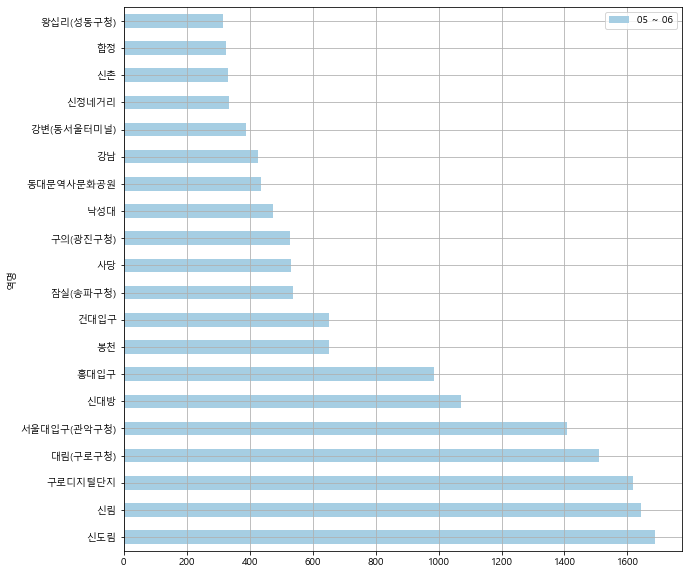

In [258]:
from matplotlib import cm
colors = cm.Paired(np.linspace(0,1,1000))
df_pivot = pd.pivot_table(data = df, values = '05 ~ 06', index ='역명')
df_pivot.sort_values(by= '05 ~ 06', ascending = False).head(n = 20).plot(kind='barh', grid=True, figsize=(10,10), color = colors)
plt.show()